# get gene coverage for all the TARA runs

In [2]:
import pandas as pd

In [3]:
#list run ids
run_keys = pd.read_csv("runs_samples_keys.csv")
run_keys.head()

,run_id,tara_label
0,ERR598993,TARA_018_SRF_0.22-1.6
1,ERR599140,TARA_018_SRF_0.22-1.6
2,ERR315859,TARA_023_DCM_0.22-1.6
3,ERR315860,TARA_023_DCM_0.22-1.6
4,ERR315858,TARA_023_SRF_0.22-1.6


In [4]:
coverage = pd.DataFrame()

for run_id in run_keys['run_id']:
    print "processing run %s..." % run_id
    #read in genes file
    genes_path = '~/Projects/SAR86/satellite_models/get_gene_data/sar86_genes/'
    file_name = run_id+'.SAR86.genes'
    cnv = pd.read_csv(genes_path+file_name,delimiter='\t')
    #drop copy_number column 
    cnv = cnv.drop('copy_number', axis=1)
    #pivot dataframe
    cnv['index'] = run_id 
    pivoted = cnv.pivot(index='index',columns='gene_id',values='coverage')
    #append to copy_number dataframe
    if len(coverage)==0:
        coverage = pivoted
    else:
        coverage = coverage.append(pivoted)

coverage.head()

processing run ERR598993...
processing run ERR599140...
processing run ERR315859...
processing run ERR315860...
processing run ERR315858...
processing run ERR315861...
processing run ERR598951...
processing run ERR599043...
processing run ERR318618...
processing run ERR318619...
processing run ERR318620...
processing run ERR318621...
processing run ERR315862...
processing run ERR315863...
processing run ERR598969...
processing run ERR599106...
processing run ERR599061...
processing run ERR599097...
processing run ERR599041...
processing run ERR599116...
processing run ERR599155...
processing run ERR599049...
processing run ERR599134...
processing run ERR594334...
processing run ERR598966...
processing run ERR599143...
processing run ERR594312...
processing run ERR599109...
processing run ERR599167...
processing run ERR594330...
processing run ERR599102...
processing run ERR599158...
processing run ERR599145...
processing run ERR594346...
processing run ERR599037...
processing run ERR59

gene_id,fig|1123864.3.peg.102|VBISARClu237429_0102|,fig|1123864.3.peg.103|VBISARClu237429_0103|,fig|1123864.3.peg.105|VBISARClu237429_0105|,fig|1123864.3.peg.106|VBISARClu237429_0106|,fig|1123864.3.peg.108|VBISARClu237429_0108|,fig|1123864.3.peg.109|VBISARClu237429_0109|,fig|1123864.3.peg.111|VBISARClu237429_0111|,fig|1123864.3.peg.112|VBISARClu237429_0112|,fig|1123864.3.peg.115|VBISARClu237429_0115|,fig|1123864.3.peg.116|VBISARClu237429_0116|,...,scf7180009409913_26157_27140_26,scf7180009409913_27144_28913_27,scf7180009409913_28976_30082_28,scf7180009409913_30060_31295_29,scf7180009409913_31282_32319_30,scf7180009409913_32383_33123_31,scf7180009409913_33125_33334_32,scf7180009409913_4750_2468_4,scf7180009409913_5274_4753_5,scf7180009409913_5681_8779_6
index,,,,,,,,,,,,,,,,,,,,,
ERR598993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.822154,1.450282,0.708220,1.809871,2.198459,2.862348,0.0,0.086290,0.386973,0.000000
ERR599140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.091463,0.209040,0.036134,0.567152,0.327553,0.000000,0.0,0.149803,0.000000,0.000000
ERR315859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.934959,9.546893,2.859079,10.380259,10.408478,4.033738,0.0,1.509855,2.544061,0.024524
ERR315860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.479675,9.985311,2.558266,10.725728,10.827553,3.801619,0.0,1.275953,1.844828,0.226847
ERR315858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.816057,2.340678,2.094851,4.508091,4.132948,0.582996,0.0,0.544021,0.413793,0.260407


In [5]:
coverage.shape

(235, 51711)

In [11]:
coverage.to_csv('GeneCoverageMatrix.csv',index_label="run_id")

# normalize coverage to scale to 1 for each TARA site

(divide each row by the row's mean)

In [6]:
def scale_rows_to_one(df):
    #mean of each row if axis is 1, mean of each column if axis is 0
    rowmeans = df.mean(axis=1, skipna=True)
    #divide each row by its mean
    norm = df.div(rowmeans, axis=0)
    return norm

In [7]:
normalized = scale_rows_to_one(df=coverage)
normalized.head()

gene_id,fig|1123864.3.peg.102|VBISARClu237429_0102|,fig|1123864.3.peg.103|VBISARClu237429_0103|,fig|1123864.3.peg.105|VBISARClu237429_0105|,fig|1123864.3.peg.106|VBISARClu237429_0106|,fig|1123864.3.peg.108|VBISARClu237429_0108|,fig|1123864.3.peg.109|VBISARClu237429_0109|,fig|1123864.3.peg.111|VBISARClu237429_0111|,fig|1123864.3.peg.112|VBISARClu237429_0112|,fig|1123864.3.peg.115|VBISARClu237429_0115|,fig|1123864.3.peg.116|VBISARClu237429_0116|,...,scf7180009409913_26157_27140_26,scf7180009409913_27144_28913_27,scf7180009409913_28976_30082_28,scf7180009409913_30060_31295_29,scf7180009409913_31282_32319_30,scf7180009409913_32383_33123_31,scf7180009409913_33125_33334_32,scf7180009409913_4750_2468_4,scf7180009409913_5274_4753_5,scf7180009409913_5681_8779_6
index,,,,,,,,,,,,,,,,,,,,,
ERR598993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.301286,0.154828,0.075608,0.193217,0.234702,0.305577,0.0,0.009212,0.041312,0.000000
ERR599140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.065191,0.148994,0.025755,0.404241,0.233466,0.000000,0.0,0.106773,0.000000,0.000000
ERR315859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.997034,1.919028,0.574706,2.086544,2.092216,0.810825,0.0,0.303497,0.511384,0.004930
ERR315860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.946510,2.050334,0.525302,2.202368,2.223276,0.780606,0.0,0.261998,0.378808,0.046580
ERR315858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.875441,0.727658,0.651237,1.401452,1.284830,0.181239,0.0,0.169122,0.128638,0.080954


In [8]:
normalized.to_csv("GeneCoverageMatrix_Normalized.csv")

### make some histograms of per-sample gene depth

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 526.,  506.,  460.,  408.,  401.,  511.,  478.,  403.,  206.,
         145.,  152.,  107.,   90.,   79.,   95.,   68.,   89.,   98.,
         106.,  120.,  147.,  151.,  167.,  199.,  216.,  221.,  193.,
         186.,  156.,  104.,   80.,   59.,   47.,   37.,   39.,   26.,
          19.,   27.,   15.,   14.,   14.,    5.,    7.,    5.,    6.,
           4.,    1.,    2.,    1.,    5.]),
 array([  1.5 ,   1.87,   2.24,   2.61,   2.98,   3.35,   3.72,   4.09,
          4.46,   4.83,   5.2 ,   5.57,   5.94,   6.31,   6.68,   7.05,
          7.42,   7.79,   8.16,   8.53,   8.9 ,   9.27,   9.64,  10.01,
         10.38,  10.75,  11.12,  11.49,  11.86,  12.23,  12.6 ,  12.97,
         13.34,  13.71,  14.08,  14.45,  14.82,  15.19,  15.56,  15.93,
         16.3 ,  16.67,  17.04,  17.41,  17.78,  18.15,  18.52,  18.89,
         19.26,  19.63,  20.  ]),
 <a list of 50 Patch objects>)

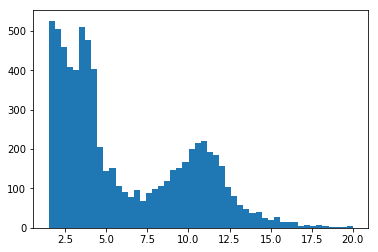

In [106]:
plt.hist(normalized.loc['ERR598993',:], bins=50, range=(1.5,20))

In [81]:
run_keys[run_keys['run_id']=='ERR599140']

,run_id,tara_label
1,ERR599140,TARA_018_SRF_0.22-1.6


(array([ 1231.,   703.,   551.,   456.,   459.,   459.,   400.,   444.,
          333.,   289.,   193.,   166.,   127.,   105.,    98.,   116.,
           88.,   110.,   116.,   130.,   136.,   144.,   158.,   149.,
          183.,   137.,   176.,   173.,   138.,   127.,   120.,   107.,
           68.,    66.,    51.,    32.,    27.,    31.,    24.,    17.,
           14.,    15.,    10.,     6.,     6.,     7.,     2.,     3.,
            3.,     0.]),
 array([  1.  ,   1.38,   1.76,   2.14,   2.52,   2.9 ,   3.28,   3.66,
          4.04,   4.42,   4.8 ,   5.18,   5.56,   5.94,   6.32,   6.7 ,
          7.08,   7.46,   7.84,   8.22,   8.6 ,   8.98,   9.36,   9.74,
         10.12,  10.5 ,  10.88,  11.26,  11.64,  12.02,  12.4 ,  12.78,
         13.16,  13.54,  13.92,  14.3 ,  14.68,  15.06,  15.44,  15.82,
         16.2 ,  16.58,  16.96,  17.34,  17.72,  18.1 ,  18.48,  18.86,
         19.24,  19.62,  20.  ]),
 <a list of 50 Patch objects>)

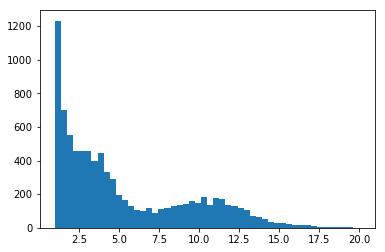

In [103]:
plt.hist(normalized.loc['ERR599140',:], bins=50, range=(1,20))

(array([ 500.,  434.,  391.,  405.,  373.,  346.,  377.,  376.,  394.,
         371.,  420.,  369.,  312.,  262.,  228.,  147.,  126.,  104.,
          87.,   78.,   78.,   61.,   67.,   67.,   68.,   41.,   48.,
          52.,   55.,   46.,   49.,   35.,   42.,   48.,   41.,   48.,
          36.,   43.,   28.,   35.,   29.,   30.,   25.,   17.,   14.,
          15.,   11.,    8.,    4.,    5.]),
 array([  2.  ,   2.36,   2.72,   3.08,   3.44,   3.8 ,   4.16,   4.52,
          4.88,   5.24,   5.6 ,   5.96,   6.32,   6.68,   7.04,   7.4 ,
          7.76,   8.12,   8.48,   8.84,   9.2 ,   9.56,   9.92,  10.28,
         10.64,  11.  ,  11.36,  11.72,  12.08,  12.44,  12.8 ,  13.16,
         13.52,  13.88,  14.24,  14.6 ,  14.96,  15.32,  15.68,  16.04,
         16.4 ,  16.76,  17.12,  17.48,  17.84,  18.2 ,  18.56,  18.92,
         19.28,  19.64,  20.  ]),
 <a list of 50 Patch objects>)

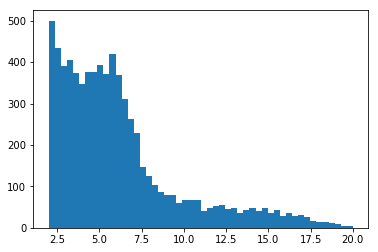

In [112]:
plt.hist(normalized.loc['ERR315859',:], bins=50, range=(2,20))

(array([ 1013.,   908.,   620.,   528.,   472.,   416.,   378.,   374.,
          397.,   367.,   413.,   411.,   416.,   415.,   325.,   292.,
          227.,   154.,   128.,    99.,    88.,    68.,    81.,    63.,
           70.,    58.,    60.,    54.,    56.,    55.,    45.,    53.,
           52.,    46.,    42.,    38.,    43.,    49.,    43.,    28.,
           24.,    34.,    33.,    14.,    18.,    12.,     8.,    15.,
            7.,    11.]),
 array([  1.  ,   1.38,   1.76,   2.14,   2.52,   2.9 ,   3.28,   3.66,
          4.04,   4.42,   4.8 ,   5.18,   5.56,   5.94,   6.32,   6.7 ,
          7.08,   7.46,   7.84,   8.22,   8.6 ,   8.98,   9.36,   9.74,
         10.12,  10.5 ,  10.88,  11.26,  11.64,  12.02,  12.4 ,  12.78,
         13.16,  13.54,  13.92,  14.3 ,  14.68,  15.06,  15.44,  15.82,
         16.2 ,  16.58,  16.96,  17.34,  17.72,  18.1 ,  18.48,  18.86,
         19.24,  19.62,  20.  ]),
 <a list of 50 Patch objects>)

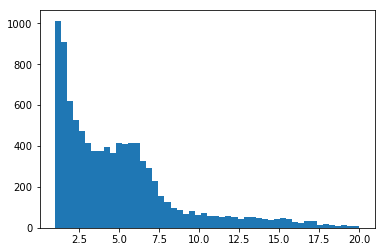

In [116]:
plt.hist(normalized.loc['ERR315860',:], bins=50, range=(1,20))

(array([ 597.,  559.,  502.,  465.,  417.,  408.,  358.,  336.,  313.,
         270.,  275.,  262.,  219.,  217.,  171.,  143.,  129.,  143.,
         110.,   95.,  104.,   82.,   77.,   62.,   60.,   44.,   36.,
          49.,   57.,   49.,   59.,   46.,   42.,   46.,   35.,   32.,
          37.,   54.,   42.,   40.,   38.,   33.,   33.,   25.,   19.,
          23.,   14.,   12.,    9.,   15.]),
 array([  2.  ,   2.36,   2.72,   3.08,   3.44,   3.8 ,   4.16,   4.52,
          4.88,   5.24,   5.6 ,   5.96,   6.32,   6.68,   7.04,   7.4 ,
          7.76,   8.12,   8.48,   8.84,   9.2 ,   9.56,   9.92,  10.28,
         10.64,  11.  ,  11.36,  11.72,  12.08,  12.44,  12.8 ,  13.16,
         13.52,  13.88,  14.24,  14.6 ,  14.96,  15.32,  15.68,  16.04,
         16.4 ,  16.76,  17.12,  17.48,  17.84,  18.2 ,  18.56,  18.92,
         19.28,  19.64,  20.  ]),
 <a list of 50 Patch objects>)

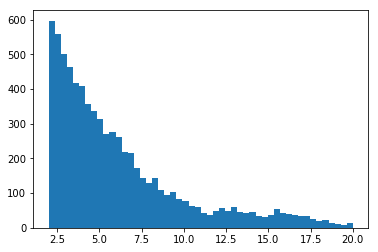

In [172]:
plt.hist(normalized.loc['ERR315858',:], bins=50, range=(2,20))

In [124]:
run_keys['run_id']

0      ERR598993
1      ERR599140
2      ERR315859
3      ERR315860
4      ERR315858
5      ERR315861
6      ERR598951
7      ERR599043
8      ERR318618
9      ERR318619
10     ERR318620
11     ERR318621
12     ERR315862
13     ERR315863
14     ERR598969
15     ERR599106
16     ERR599061
17     ERR599097
18     ERR599041
19     ERR599116
20     ERR599155
21     ERR599049
22     ERR599134
23     ERR594334
24     ERR598966
25     ERR599143
26     ERR594312
27     ERR599109
28     ERR599167
29     ERR594330
         ...    
205    ERR599142
206    ERR598942
207    ERR599052
208    ERR598987
209    ERR599070
210    ERR599099
211    ERR599147
212    ERR599015
213    ERR599076
214    ERR599127
215    ERR599152
216    ERR598989
217    ERR599162
218    ERR599029
219    ERR599100
220    ERR598985
221    ERR599136
222    ERR599166
223    ERR598983
224    ERR599123
225    ERR598958
226    ERR598964
227    ERR598963
228    ERR598996
229    ERR599170
230    ERR598986
231    ERR598976
232    ERR5989

(array([ 926.,  691.,  659.,  608.,  532.,  515.,  448.,  405.,  407.,
         416.,  320.,  290.,  299.,  280.,  238.,  197.,  159.,  177.,
         145.,  132.,  107.,   98.,   83.,   74.,   79.,   60.,   60.,
          63.,   48.,   42.,   48.,   52.,   57.,   52.,   55.,   34.,
          55.,   51.,   34.,   42.,   45.,   32.,   37.,   32.,   30.,
          19.,   19.,   14.,    5.,    8.]),
 array([  1.  ,   1.38,   1.76,   2.14,   2.52,   2.9 ,   3.28,   3.66,
          4.04,   4.42,   4.8 ,   5.18,   5.56,   5.94,   6.32,   6.7 ,
          7.08,   7.46,   7.84,   8.22,   8.6 ,   8.98,   9.36,   9.74,
         10.12,  10.5 ,  10.88,  11.26,  11.64,  12.02,  12.4 ,  12.78,
         13.16,  13.54,  13.92,  14.3 ,  14.68,  15.06,  15.44,  15.82,
         16.2 ,  16.58,  16.96,  17.34,  17.72,  18.1 ,  18.48,  18.86,
         19.24,  19.62,  20.  ]),
 <a list of 50 Patch objects>)

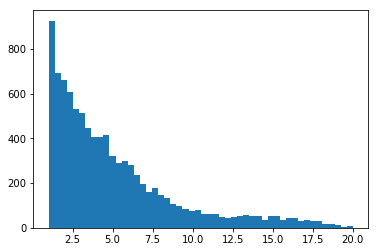

In [125]:
plt.hist(normalized.loc['ERR315861',:], bins=50, range=(1,20))

(array([ 760.,  650.,  571.,  472.,  403.,  406.,  429.,  440.,  425.,
         414.,  395.,  344.,  294.,  272.,  227.,  216.,  213.,  180.,
         165.,  129.,  110.,  115.,  102.,   74.,   61.,   57.,   50.,
          61.,   69.,   67.,   70.,   83.,   80.,   76.,   54.,   60.,
          55.,   54.,   42.,   35.,   33.,   28.,   21.,   21.,   14.,
          17.,   10.,    7.,   10.,    5.]),
 array([  1.  ,   1.38,   1.76,   2.14,   2.52,   2.9 ,   3.28,   3.66,
          4.04,   4.42,   4.8 ,   5.18,   5.56,   5.94,   6.32,   6.7 ,
          7.08,   7.46,   7.84,   8.22,   8.6 ,   8.98,   9.36,   9.74,
         10.12,  10.5 ,  10.88,  11.26,  11.64,  12.02,  12.4 ,  12.78,
         13.16,  13.54,  13.92,  14.3 ,  14.68,  15.06,  15.44,  15.82,
         16.2 ,  16.58,  16.96,  17.34,  17.72,  18.1 ,  18.48,  18.86,
         19.24,  19.62,  20.  ]),
 <a list of 50 Patch objects>)

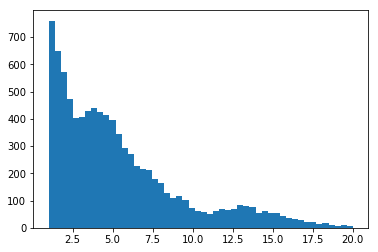

In [128]:
plt.hist(normalized.loc['ERR598951',:], bins=50, range=(1,20))

(array([ 1144.,   755.,   774.,   620.,   381.,   349.,   368.,   430.,
          491.,   448.,   483.,   376.,   374.,   300.,   287.,   216.,
          208.,   184.,   204.,   163.,   168.,   124.,    71.,    56.,
           51.,    57.,    75.,    61.,    71.,    69.,    78.,    72.,
           80.,    74.,    72.,    79.,    84.,    58.,    47.,    32.,
           16.,    20.,    21.,    18.,    10.,     7.,     8.,    14.,
            4.,     3.]),
 array([  0.6  ,   0.988,   1.376,   1.764,   2.152,   2.54 ,   2.928,
          3.316,   3.704,   4.092,   4.48 ,   4.868,   5.256,   5.644,
          6.032,   6.42 ,   6.808,   7.196,   7.584,   7.972,   8.36 ,
          8.748,   9.136,   9.524,   9.912,  10.3  ,  10.688,  11.076,
         11.464,  11.852,  12.24 ,  12.628,  13.016,  13.404,  13.792,
         14.18 ,  14.568,  14.956,  15.344,  15.732,  16.12 ,  16.508,
         16.896,  17.284,  17.672,  18.06 ,  18.448,  18.836,  19.224,
         19.612,  20.   ]),
 <a list of 50 Pa

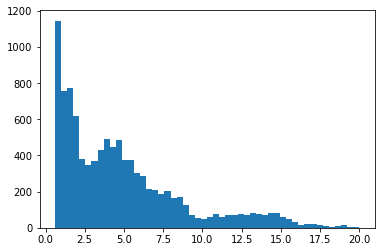

In [160]:
plt.hist(normalized.loc['ERR599043',:], bins=50, range=(0.6,20))

(array([ 868.,  785.,  791.,  729.,  564.,  476.,  433.,  412.,  484.,
         525.,  576.,  561.,  438.,  366.,  312.,  274.,  231.,  233.,
         223.,  236.,  228.,  207.,  193.,  177.,   99.,   55.,   32.,
          19.,   10.,   12.,    4.,    2.,    1.,    0.,    0.,    1.,
           1.,    0.,    0.,    0.,    1.,    1.,    1.,    0.,    0.,
           0.,    0.,    1.,    0.,    1.]),
 array([  1.  ,   1.38,   1.76,   2.14,   2.52,   2.9 ,   3.28,   3.66,
          4.04,   4.42,   4.8 ,   5.18,   5.56,   5.94,   6.32,   6.7 ,
          7.08,   7.46,   7.84,   8.22,   8.6 ,   8.98,   9.36,   9.74,
         10.12,  10.5 ,  10.88,  11.26,  11.64,  12.02,  12.4 ,  12.78,
         13.16,  13.54,  13.92,  14.3 ,  14.68,  15.06,  15.44,  15.82,
         16.2 ,  16.58,  16.96,  17.34,  17.72,  18.1 ,  18.48,  18.86,
         19.24,  19.62,  20.  ]),
 <a list of 50 Patch objects>)

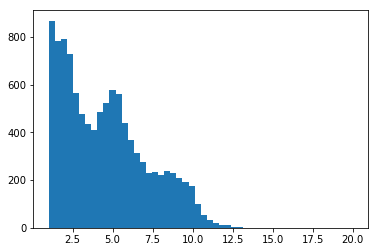

In [130]:
plt.hist(normalized.loc['ERR318618',:], bins=50, range=(1,20))

(array([  1.10400000e+03,   8.99000000e+02,   7.36000000e+02,
          7.26000000e+02,   6.30000000e+02,   5.71000000e+02,
          5.54000000e+02,   5.12000000e+02,   4.78000000e+02,
          4.97000000e+02,   4.09000000e+02,   4.17000000e+02,
          3.72000000e+02,   3.39000000e+02,   2.97000000e+02,
          2.62000000e+02,   2.48000000e+02,   2.25000000e+02,
          2.29000000e+02,   1.73000000e+02,   1.38000000e+02,
          1.47000000e+02,   1.13000000e+02,   8.90000000e+01,
          8.20000000e+01,   8.30000000e+01,   6.20000000e+01,
          4.70000000e+01,   4.20000000e+01,   2.80000000e+01,
          2.10000000e+01,   2.00000000e+01,   1.20000000e+01,
          1.60000000e+01,   7.00000000e+00,   5.00000000e+00,
          7.00000000e+00,   9.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
        

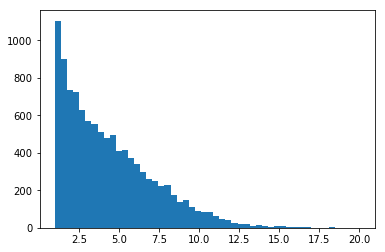

In [132]:
plt.hist(normalized.loc['ERR318621',:], bins=50, range=(1,20))

(array([  1.01600000e+03,   9.13000000e+02,   7.41000000e+02,
          6.75000000e+02,   6.34000000e+02,   5.97000000e+02,
          5.85000000e+02,   5.39000000e+02,   5.03000000e+02,
          4.69000000e+02,   4.31000000e+02,   3.80000000e+02,
          3.67000000e+02,   3.24000000e+02,   3.34000000e+02,
          2.89000000e+02,   2.50000000e+02,   2.04000000e+02,
          2.12000000e+02,   1.74000000e+02,   1.60000000e+02,
          1.51000000e+02,   1.11000000e+02,   1.01000000e+02,
          8.30000000e+01,   8.00000000e+01,   5.50000000e+01,
          3.10000000e+01,   4.20000000e+01,   2.30000000e+01,
          2.20000000e+01,   1.80000000e+01,   2.30000000e+01,
          1.20000000e+01,   4.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

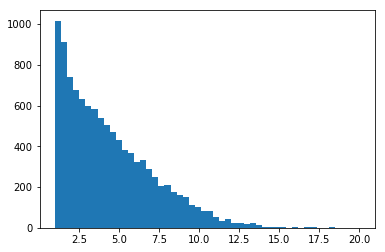

In [133]:
plt.hist(normalized.loc['ERR318619',:], bins=50, range=(1,20))

(array([  1.97100000e+03,   1.02000000e+03,   8.05000000e+02,
          8.24000000e+02,   8.25000000e+02,   6.46000000e+02,
          5.35000000e+02,   4.29000000e+02,   4.26000000e+02,
          4.78000000e+02,   5.24000000e+02,   5.99000000e+02,
          5.74000000e+02,   4.73000000e+02,   4.23000000e+02,
          3.44000000e+02,   2.92000000e+02,   2.43000000e+02,
          2.41000000e+02,   2.35000000e+02,   2.20000000e+02,
          2.30000000e+02,   2.20000000e+02,   1.97000000e+02,
          1.65000000e+02,   1.03000000e+02,   6.30000000e+01,
          2.50000000e+01,   1.40000000e+01,   5.00000000e+00,
          6.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
        

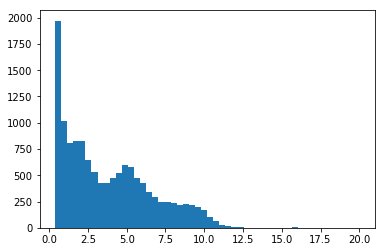

In [156]:
plt.hist(normalized.loc['ERR318620',:], bins=50, range=(0.37,20))

(array([ 1751.,  1184.,   900.,   835.,   677.,   595.,   524.,   459.,
          398.,   377.,   317.,   298.,   272.,   279.,   231.,   184.,
          196.,   199.,   173.,   142.,   139.,   129.,   113.,    99.,
          108.,    91.,    79.,    67.,    66.,    63.,    54.,    54.,
           51.,    42.,    36.,    34.,    37.,    32.,    22.,    17.,
           10.,    18.,    14.,    18.,    23.,    17.,    16.,    12.,
           16.,     6.]),
 array([  0.37  ,   0.7626,   1.1552,   1.5478,   1.9404,   2.333 ,
          2.7256,   3.1182,   3.5108,   3.9034,   4.296 ,   4.6886,
          5.0812,   5.4738,   5.8664,   6.259 ,   6.6516,   7.0442,
          7.4368,   7.8294,   8.222 ,   8.6146,   9.0072,   9.3998,
          9.7924,  10.185 ,  10.5776,  10.9702,  11.3628,  11.7554,
         12.148 ,  12.5406,  12.9332,  13.3258,  13.7184,  14.111 ,
         14.5036,  14.8962,  15.2888,  15.6814,  16.074 ,  16.4666,
         16.8592,  17.2518,  17.6444,  18.037 ,  18.4296,  18.8222

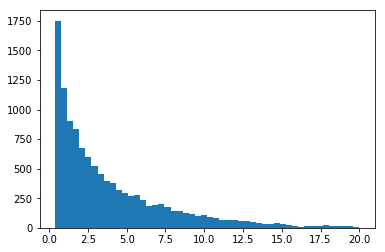

In [166]:
plt.hist(normalized.loc['ERR315862',:], bins=50, range=(0.37,20))

(array([ 1076.,   656.,   602.,   579.,   579.,   619.,   559.,   539.,
          474.,   455.,   347.,   296.,   246.,   184.,   176.,   166.,
          160.,   167.,   132.,   137.,   124.,   124.,   114.,   107.,
          115.,   111.,    85.,    73.,    61.,    69.,    49.,    56.,
           46.,    39.,    31.,    49.,    43.,    40.,    40.,    27.,
           34.,    30.,    24.,    12.,    14.,    11.,     4.,     5.,
            5.,     4.]),
 array([  1.  ,   1.38,   1.76,   2.14,   2.52,   2.9 ,   3.28,   3.66,
          4.04,   4.42,   4.8 ,   5.18,   5.56,   5.94,   6.32,   6.7 ,
          7.08,   7.46,   7.84,   8.22,   8.6 ,   8.98,   9.36,   9.74,
         10.12,  10.5 ,  10.88,  11.26,  11.64,  12.02,  12.4 ,  12.78,
         13.16,  13.54,  13.92,  14.3 ,  14.68,  15.06,  15.44,  15.82,
         16.2 ,  16.58,  16.96,  17.34,  17.72,  18.1 ,  18.48,  18.86,
         19.24,  19.62,  20.  ]),
 <a list of 50 Patch objects>)

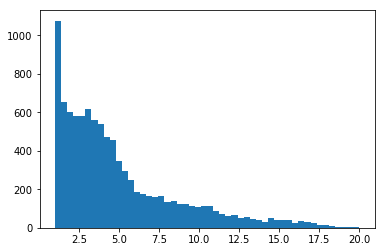

In [136]:
plt.hist(normalized.loc['ERR315863',:], bins=50, range=(1,20))

In [137]:
import numpy as np

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.30000000e+01,   5.00000000e+01,
          1.60000000e+02,   4.00000000e+02,   6.80000000e+02,
          8.20000000e+02,   1.03200000e+03,   1.15400000e+03,
          1.21500000e+03,   1.17000000e+03,   1.09700000e+03,
          9.23000000e+02,   8.59000000e+02,   8.52000000e+02,
          9.09000000e+02,   1.12000000e+03,   1.05300000e+03,
          1.21600000e+03,   1.26900000e+03,   1.19300000e+03,
          1.70400000e+03,   2.13100000e+03,   1.38600000e+03,
          1.19500000e+03,   6.95000000e+02,   1.31000000e+02,
          1.20000000e+01,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

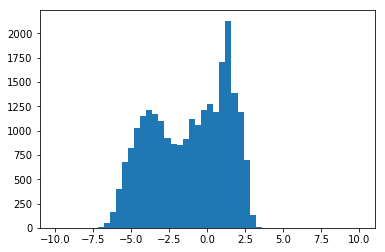

In [145]:
plt.hist(np.log(normalized.loc['ERR315863',:]+0.00000000000001), bins=50, range=(-10,10))

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.00000000e+00,
          2.40000000e+01,   9.50000000e+01,   2.41000000e+02,
          4.29000000e+02,   6.05000000e+02,   8.17000000e+02,
          8.76000000e+02,   1.02400000e+03,   1.02500000e+03,
          1.07700000e+03,   1.00100000e+03,   8.89000000e+02,
          9.46000000e+02,   8.75000000e+02,   8.80000000e+02,
          9.24000000e+02,   9.49000000e+02,   9.69000000e+02,
          1.02700000e+03,   1.24100000e+03,   1.45200000e+03,
          1.53300000e+03,   1.51700000e+03,   1.43200000e+03,
          1.10700000e+03,   5.76000000e+02,   2.16000000e+02,
          7.20000000e+01,   1.20000000e+01,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

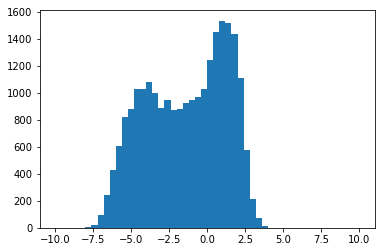

In [148]:
plt.hist(np.log(normalized.loc['ERR315862',:]+0.00000000000001), bins=50, range=(-10,10))

(array([  480.,   495.,   602.,   693.,   647.,   718.,   733.,   787.,
          749.,   719.,   755.,   756.,   783.,   725.,   676.,   597.,
          596.,   571.,   630.,   689.,   677.,   558.,   530.,   422.,
          449.,   449.,   517.,   654.,   602.,   428.,   589.,   860.,
         1067.,   984.,   795.,   713.,   330.,   451.,   451.,   108.,
            7.,     5.,     0.,     2.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 50 Patch objects>)

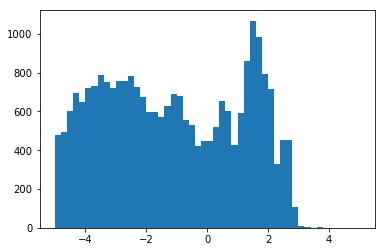

In [164]:
plt.hist(np.log(normalized.loc['ERR599043',:]+0.00000000000001), bins=50, range=(-5,5))

### okay so the cut off is not obvious

It looks to me like particularly where there's a really clear modal/bimodal/(trimodal?) distribution, a cutoff of e^-1 looks pretty good, like it more or less bisects the peak in the very small numbers (e^-3, e^-4...) and the definitely-signal peak in the higher numbers. But, sometimes it looks like it's closer to e^0, or could be a smaller number...

So, I'm going to write up the normalization steps as a function and maybe try training all my models using coverage data with different cutoff levels. While I troubleshoot, I'll use a cutoff of e^-1 (=0.37).

(array([  29.,   81.,  108.,   89.,  115.,  107.,   74.,   92.,   64.,
          48.,   41.,   30.,   36.,   30.,   21.,   19.,   16.,   12.,
          10.,   11.,   10.,    4.,    1.,    4.,    4.,    2.,    1.,
           1.,    2.,    5.,    1.,    0.,    1.,    1.,    2.,    0.,
           1.,    2.,    3.,    1.,    0.,    2.,    0.,    0.,    0.,
           1.,    0.,    1.,    0.,    0.]),
 array([  0.5 ,   0.89,   1.28,   1.67,   2.06,   2.45,   2.84,   3.23,
          3.62,   4.01,   4.4 ,   4.79,   5.18,   5.57,   5.96,   6.35,
          6.74,   7.13,   7.52,   7.91,   8.3 ,   8.69,   9.08,   9.47,
          9.86,  10.25,  10.64,  11.03,  11.42,  11.81,  12.2 ,  12.59,
         12.98,  13.37,  13.76,  14.15,  14.54,  14.93,  15.32,  15.71,
         16.1 ,  16.49,  16.88,  17.27,  17.66,  18.05,  18.44,  18.83,
         19.22,  19.61,  20.  ]),
 <a list of 50 Patch objects>)

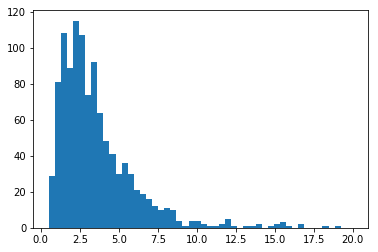

In [12]:
plt.hist(normalized.loc['ERR594312',:], bins=50, range=(0.5,20))

(array([  3.23400000e+03,   2.19900000e+03,   1.55900000e+03,
          1.12200000e+03,   7.56000000e+02,   6.29000000e+02,
          5.30000000e+02,   4.59000000e+02,   3.60000000e+02,
          3.27000000e+02,   3.19000000e+02,   2.97000000e+02,
          2.82000000e+02,   2.68000000e+02,   2.61000000e+02,
          2.43000000e+02,   2.01000000e+02,   1.90000000e+02,
          1.90000000e+02,   1.41000000e+02,   1.07000000e+02,
          7.20000000e+01,   5.30000000e+01,   4.20000000e+01,
          2.60000000e+01,   1.70000000e+01,   1.20000000e+01,
          1.10000000e+01,   8.00000000e+00,   5.00000000e+00,
          4.00000000e+00,   7.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   6.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
        

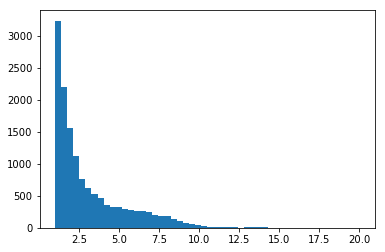

In [52]:
plt.hist(normalized.loc['ERR598982',:], bins=50, range=(1,20))

## convert to presence/absence

use 0.37 as cutoff at least initially (which is e^-1)

In [190]:
def binarize_matrix(df, threshold=0.37):
    new_df = df.copy()
    new_df[new_df > 0.37] = 1
    new_df[new_df <= 0.37] = 0
    return new_df

normalized_37 = binarize_matrix(normalized, threshold=0.37)
normalized_37.head()

gene_id,fig|1123864.3.peg.102|VBISARClu237429_0102|,fig|1123864.3.peg.103|VBISARClu237429_0103|,fig|1123864.3.peg.105|VBISARClu237429_0105|,fig|1123864.3.peg.106|VBISARClu237429_0106|,fig|1123864.3.peg.108|VBISARClu237429_0108|,fig|1123864.3.peg.109|VBISARClu237429_0109|,fig|1123864.3.peg.111|VBISARClu237429_0111|,fig|1123864.3.peg.112|VBISARClu237429_0112|,fig|1123864.3.peg.115|VBISARClu237429_0115|,fig|1123864.3.peg.116|VBISARClu237429_0116|,...,scf7180009409913_26157_27140_26,scf7180009409913_27144_28913_27,scf7180009409913_28976_30082_28,scf7180009409913_30060_31295_29,scf7180009409913_31282_32319_30,scf7180009409913_32383_33123_31,scf7180009409913_33125_33334_32,scf7180009409913_4750_2468_4,scf7180009409913_5274_4753_5,scf7180009409913_5681_8779_6
index,,,,,,,,,,,,,,,,,,,,,
ERR598993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR599140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR315859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
ERR315860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
ERR315858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [192]:
normalized_37.to_csv("GeneCoverageMatrix_Normalized037_Binary.csv")